# This script processes a citation network text file 
And builds a dictionary mapping each paper's unique `#index` to a list of paper indices it references (i.e., citations). It includes logic to ensure that only papers with authors listed are considered, and references (`#%`) are only counted for such papers. The final mapping is saved in mapping_idx.pkl file


In [3]:
import pickle

def parse_txt_to_dict_streaming(input_file, output_file):
    data_dict = {}
    current_refs = []
    has_authors = False
    current_index = None

    with open(input_file, 'r', encoding='utf-8') as f:
        next(f)  # skip first line

        for line in f:
            line = line.strip()
            if line.startswith('#*'):
                current_refs = []
                has_authors = False
                current_index = None
            elif line.startswith('#@'):
                if line != '#@':
                    has_authors = True
            elif line.startswith('#%'):
                if has_authors:
                    ref = line[2:].strip()
                    if ref.isdigit():
                        current_refs.append(int(ref))
            elif line.startswith('#index'):
                if has_authors:
                    current_index = int(line[6:].strip())
                    data_dict[current_index] = current_refs

                    # Optional: periodically dump to disk to free memory
                    if len(data_dict) % 10000 == 0:
                        print(f"Processed {len(data_dict)} entries")

    # Save the final dictionary
    with open(output_file, 'wb') as f:
        pickle.dump(data_dict, f, protocol=pickle.HIGHEST_PROTOCOL)

    print(f"Saved {len(data_dict)} entries to {output_file}")

parse_txt_to_dict_streaming('citation-network2.txt', 'mapping_idx.pkl')


Processed 10000 entries
Processed 20000 entries
Processed 30000 entries
Processed 40000 entries
Processed 50000 entries
Processed 60000 entries
Processed 70000 entries
Processed 80000 entries
Processed 90000 entries
Processed 100000 entries
Processed 110000 entries
Processed 120000 entries
Processed 130000 entries
Processed 140000 entries
Processed 150000 entries
Processed 160000 entries
Processed 170000 entries
Processed 180000 entries
Processed 190000 entries
Processed 200000 entries
Processed 210000 entries
Processed 220000 entries
Processed 230000 entries
Processed 240000 entries
Processed 250000 entries
Processed 260000 entries
Processed 270000 entries
Processed 280000 entries
Processed 290000 entries
Processed 300000 entries
Processed 310000 entries
Processed 320000 entries
Processed 330000 entries
Processed 340000 entries
Processed 350000 entries
Processed 360000 entries
Processed 370000 entries
Processed 380000 entries
Processed 390000 entries
Processed 400000 entries
Processed

In [4]:
import pickle

# Load the dictionary from the pickle file
with open('mapping_idx.pkl', 'rb') as f:
    data_dict = pickle.load(f)

# Print top 10 items (key-value pairs)
for i, (key, value) in enumerate(data_dict.items()):
    print(f"{key}: {value}")
    if i == 9:
        break

0: []
1: [774794, 95940]
3: [858446, 435642, 1293715, 412124, 414766, 1301929, 1102537, 102223]
4: []
5: []
6: []
7: []
8: [378882]
9: [684494, 439170, 495494, 794270, 911369, 800580, 376413, 102495, 511257, 423180, 402729]
10: []


# Remove entries with empty value lists

In [5]:
import pickle

# Load the dictionary
with open("mapping_idx.pkl", "rb") as f:
    mapping_idx = pickle.load(f)

# Remove entries with empty value lists
filtered_mapping = {k: v for k, v in mapping_idx.items() if v}

# Save the filtered dictionary
with open("mapping_idx_filtered.pkl", "wb") as f:
    pickle.dump(filtered_mapping, f)

print(f"Filtered dictionary saved with {len(filtered_mapping)} entries.")


Filtered dictionary saved with 386497 entries.


In [6]:
# Print first 10 entries for verification
for i, (k, v) in enumerate(filtered_mapping.items()):
    print(f"{k}: {v}")
    if i == 9:
        break

1: [774794, 95940]
3: [858446, 435642, 1293715, 412124, 414766, 1301929, 1102537, 102223]
8: [378882]
9: [684494, 439170, 495494, 794270, 911369, 800580, 376413, 102495, 511257, 423180, 402729]
13: [1284256, 407367, 1294040, 429402, 354224, 124237, 290792]
24: [1288569, 806859, 628820, 636684, 1300010, 301407]
25: [629319, 123113, 775152, 647357, 622012, 894102, 775711, 645080]
27: [5032]
31: [166201, 988854, 109276, 783542, 124393, 292880, 152144, 392657, 434387, 311159, 106860]
34: [406408, 301680, 950201]


**processes citation network text file and creates a dictionary mapping each paper's unique `#index` to its list of authors from the `#@` field. Only entries with non-empty author fields are considered. The resulting dictionary is saved to a `author_mapping.pkl` file for later use.**


In [7]:
import pickle

def parse_authors_to_dict(file_path):
    data_dict = {}
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    # Ignore the first line
    lines = lines[1:]

    current_authors = None
    current_index = None

    for line in lines:
        line = line.strip()

        if line.startswith("#@"):
            current_authors = line[2:].strip()
        elif line.startswith("#index"):
            current_index = int(line[6:].strip())
            if current_authors:  # Only if authors exist
                data_dict[current_index] = current_authors
            # Reset for next record
            current_authors = None
            current_index = None

    return data_dict

# File path to your input text file
input_file = "citation-network2.txt"  
output_file = "author_mapping.pkl"

# Create dictionary and save to .pkl
author_dict = parse_authors_to_dict(input_file)
with open(output_file, 'wb') as f:
    pickle.dump(author_dict, f)

print(f"Saved {len(author_dict)} records to '{output_file}'")


Saved 1329989 records to 'author_mapping.pkl'


In [8]:
import pickle

# Load the dictionary from the pickle file
with open('author_mapping.pkl', 'rb') as f:
    data_dict = pickle.load(f)

# Print top 10 items (key-value pairs)
for i, (key, value) in enumerate(data_dict.items()):
    print(f"{key}: {value}")
    if i == 9:
        break


0: E. S. Cho,C. J. Kim,S. D. Kim,S. Y. Rhew
1: Lori M. Weber,Alysha Loumakis,James Bergman
3: Choong-Gyoo Lim
4: Jose Maria Perez,Felix Garcia,Jesus Carretero,Alejandro Calderon,Luis Miguel Sanchez
5: Jean Kumagai
6: Marek Rusinkiewicz,Dimitrios Georgakopoulos
7: Barton C. Massey,Evan Tick
8: Jan Ramon
9: Therapon Skotiniotis,Ji-en Morris Chang
10: V. Martin,K. Schwan


**Filters an existing author-to-paper mapping (`author_mapping.pkl`) using a secondary file (`AMiner-Author.txt`) that contains detailed author metadata including affiliation. Only authors who have non-empty affiliations (`#a`) are retained in the final dictionary. The result is saved to a new `remove_author_#a.pkl` file.**


In [9]:
import pickle

# Load author mapping dictionary
with open("author_mapping.pkl", "rb") as f:
    author_mapping = pickle.load(f)

# Path to the large .txt file containing paper and author info
txt_file_path = "AMiner-Author.txt"

# Preprocessing:
# We'll parse the txt file once and build a mapping: author_name -> affiliation (empty if none)
author_affiliation = {}

with open(txt_file_path, "r", encoding="utf-8") as f:
    current_author = None
    current_affiliation = None
    for line in f:
        line = line.strip()
        if line.startswith("#index"):
            # reset for new paper
            current_author = None
            current_affiliation = None
        elif line.startswith("#n "):
            current_author = line[3:].strip()
        elif line.startswith("#a "):
            current_affiliation = line[3:].strip()
            if current_author is not None:
                author_affiliation[current_author] = current_affiliation

# Now filter authors from author_mapping using author_affiliation
filtered_author_mapping = {}

for key, authors_str in author_mapping.items():
    authors = [a.strip() for a in authors_str.split(",") if a.strip()]
    filtered_authors = []
    for author in authors:
        aff = author_affiliation.get(author)
        if aff and aff.strip():
            filtered_authors.append(author)
    if filtered_authors:
        filtered_author_mapping[key] = ", ".join(filtered_authors)
    # else key is skipped (all authors removed)

# Save filtered author mapping
with open("remove_author_#a.pkl", "wb") as f:
    pickle.dump(filtered_author_mapping, f)

print(f"Filtered author mapping saved with {len(filtered_author_mapping)} entries.")


Filtered author mapping saved with 1036217 entries.


In [10]:
# Print first 10 entries for verification
for i, (k, v) in enumerate(filtered_author_mapping.items()):
    print(f"{k}: {v}")
    if i == 9:
        break

0: C. J. Kim, S. D. Kim
1: Lori M. Weber, Alysha Loumakis, James Bergman
3: Choong-Gyoo Lim
4: Felix Garcia, Jesus Carretero, Luis Miguel Sanchez
5: Jean Kumagai
6: Marek Rusinkiewicz
7: Evan Tick
8: Jan Ramon
9: Therapon Skotiniotis, Ji-en Morris Chang
10: V. Martin, K. Schwan


**performs a final filtering step by intersecting a paper-to-author index mapping (`mapping_idx_filtered.pkl`) with a filtered author list (`remove_author_#a.pkl`) that contains only authors with valid affiliations. The resulting dictionary keeps only those entries where both the paper and the authors are validated, and saves it as `final_mapping.pkl`.**


In [11]:
import pickle

# Load the dictionaries
with open("mapping_idx_filtered.pkl", "rb") as f:
    mapping_idx_filtered = pickle.load(f)

with open("remove_author_#a.pkl", "rb") as f:
    remove_author_a = pickle.load(f)

# Filter the dictionary
final_mapping = {}

for key, authors in mapping_idx_filtered.items():
    # Keep key only if it's present in remove_author_a (as a key)
    if key not in remove_author_a:
        continue

    # Filter author list to only those present in remove_author_a
    filtered_authors = [author for author in authors if author in remove_author_a]

    # If filtered list is not empty, keep it
    if filtered_authors:
        final_mapping[key] = filtered_authors

# Save the final filtered mapping
with open("final_mapping.pkl", "wb") as f:
    pickle.dump(final_mapping, f)

print(f"Final mapping saved with {len(final_mapping)} keys.")


Final mapping saved with 348882 keys.


In [12]:
for i, (k, v) in enumerate(final_mapping.items()):
    print(f"{k}: {v}")
    if i == 9:
        break
    
# print(data_dict[774794])
print(final_mapping[108893])

1: [774794, 95940]
3: [858446, 435642, 412124, 414766, 1301929, 1102537, 102223]
8: [378882]
9: [684494, 439170, 495494, 800580, 102495, 511257, 402729]
13: [407367, 1294040, 429402, 354224, 124237, 290792]
24: [1288569, 806859, 628820, 636684, 1300010, 301407]
25: [629319, 123113, 775152, 647357, 622012, 775711, 645080]
27: [5032]
31: [109276, 783542, 124393, 292880, 392657, 434387, 106860]
34: [406408, 301680, 950201]
[102229, 512523, 401309, 158212, 118593, 498294, 311269, 685389]


**performs a Depth-First Search (DFS) traversal on a citation graph stored in `final_mapping.pkl`, starting from each of the first `max_nodes` papers. It collects all reachable papers (multi-hop references) and stores the result in `multi_hop_first_11000.pkl`. This helps in understanding multi-hop citation chains across papers.**


In [13]:
import pickle

# Load the input graph
with open("final_mapping.pkl", "rb") as f:
    graph = pickle.load(f)

# Parameters
max_nodes = 11000  # Only process first max_nodes(<22000) nodes
print_interval = 1000  # Print progress every 1000 nodes
output_file = "multi_hop_first_11000.pkl"  # Single output file

results = {}
processed = 0

for start_key in list(graph.keys())[:max_nodes]:  # Only take first max_nodes(<22000) keys
    visited = set()
    stack = [start_key]
    result = set()

    while stack:
        node = stack.pop()
        if node in visited:
            continue
        visited.add(node)
        if node != start_key:
            result.add(node)

        for neighbor in graph.get(node, []):
            if neighbor not in visited:
                stack.append(neighbor)

    results[start_key] = sorted(result)
    processed += 1

    # Print progress
    if processed % print_interval == 0:
        print(f"Processed {processed} keys...")
    
    # Early exit if we've reached our limit
    if processed >= max_nodes:
        break

# Save all results to a single file
with open(output_file, "wb") as f:
    pickle.dump(results, f, protocol=pickle.HIGHEST_PROTOCOL)

print(f"\nDFS completed for {processed} keys. Results saved to '{output_file}'")
print(f"Total papers processed: {len(results)}")
print(f"Example result for first key: {list(results.items())[0] if results else 'No results'}")

Processed 1000 keys...
Processed 2000 keys...
Processed 3000 keys...
Processed 4000 keys...
Processed 5000 keys...
Processed 6000 keys...
Processed 7000 keys...
Processed 8000 keys...
Processed 9000 keys...
Processed 10000 keys...
Processed 11000 keys...

DFS completed for 11000 keys. Results saved to 'multi_hop_first_11000.pkl'
Total papers processed: 11000
Example result for first key: (1, [95940, 774794])


In [14]:
with open("multi_hop_first_11000.pkl", "rb") as f:
    test = pickle.load(f)

for i, (k, v) in enumerate(test.items()):
    print(f"{k}: {v}")
    if i == 9:
        break
    
# print(data_dict[774794])
# print(test[1])

1: [95940, 774794]
3: [8923, 84655, 84674, 84760, 84847, 85261, 85455, 85489, 86596, 87440, 88519, 88577, 88910, 90082, 90099, 90450, 91017, 91166, 92426, 93341, 93451, 93608, 93784, 93830, 94367, 94388, 95191, 95198, 95810, 95894, 96166, 96334, 96378, 97469, 99366, 99834, 99920, 100419, 100988, 101360, 102187, 102223, 102675, 102773, 103324, 103461, 103665, 104391, 104550, 104659, 105004, 105391, 105775, 105884, 106307, 106475, 106717, 107511, 107588, 107945, 108027, 108322, 109333, 109414, 109480, 110103, 110426, 110775, 110854, 111906, 111938, 112070, 112795, 112954, 113332, 113922, 115336, 115901, 116079, 116259, 117325, 117344, 117640, 118204, 118232, 118367, 118697, 118751, 118971, 119304, 119523, 119613, 119928, 120113, 120424, 120724, 120736, 120896, 121413, 122084, 122582, 122677, 122899, 123053, 123409, 123508, 123728, 123938, 124087, 124571, 125483, 125603, 125755, 127025, 127589, 129683, 131872, 133792, 134431, 134708, 135471, 136203, 136639, 138227, 139039, 139201, 141028,

# Ensures a complete mapping of paper IDs to their first authors by:

1. **Loading existing mappings** from `mapping_idx.pkl`, which maps paper IDs to author strings.
2. **Extracting and storing the first author** from each author string.
3. **Parsing the original `citation-network2.txt` file** to find additional paper IDs not in the initial mapping.
4. **For each new paper**, it scans backwards from `#index` to find its `#@` author line and extracts the first author.
5. **Updates the mapping** with these new entries, resulting in a more complete `id_author_mapping`.

This is useful for ensuring every paper (with authors listed) has a known first author for further analysis.


In [15]:
import pickle

# Step 1: Load mapping_idx.pkl and extract first authors
with open("mapping_idx.pkl", "rb") as f:
    mapping_data = pickle.load(f)

id_author_mapping = {}

# Extract first author from existing mapping
for paper_id, authors in mapping_data.items():
    if isinstance(authors, str) and authors.strip():
        first_author = authors.split(",")[0].strip()
        id_author_mapping[int(paper_id)] = first_author

# Step 2: Open citation-network2.txt and add new IDs with first authors if not already present
with open("citation-network2.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()

i = 0
while i < len(lines):
    line = lines[i].strip()

    if line.startswith("#index"):
        paper_id = int(line.replace("#index", "").strip())

        # Check if ID already exists
        if paper_id not in id_author_mapping:
            # Look for #@ line (authors)
            j = i - 1
            first_author = None

            # Walk backwards to find #@ line for current paper
            while j >= 0:
                author_line = lines[j].strip()
                if author_line.startswith("#@"):
                    author_data = author_line.replace("#@", "").strip()
                    if author_data:
                        first_author = author_data.split(",")[0].strip()
                    break
                j -= 1

            # Add if valid first author found
            if first_author:
                id_author_mapping[paper_id] = first_author

    i += 1

#  Final Output
print(" Total IDs collected:", len(id_author_mapping))



 Total IDs collected: 1329989


In [16]:
for i, (k, v) in enumerate(id_author_mapping.items()):
    print(f"{k}: {v}")
    if i == 9:
        break

import pickle

# Save the dictionary to id_author_mapping.pkl
with open("id_author_mapping.pkl", "wb") as f:
    pickle.dump(id_author_mapping, f)

print("id_author_mapping has been saved to id_author_mapping.pkl")


0: E. S. Cho
1: Lori M. Weber
3: Choong-Gyoo Lim
4: Jose Maria Perez
5: Jean Kumagai
6: Marek Rusinkiewicz
7: Barton C. Massey
8: Jan Ramon
9: Therapon Skotiniotis
10: V. Martin
id_author_mapping has been saved to id_author_mapping.pkl


# Processes multi-hop citation data and converts paper IDs into author names.

**Workflow:**
1. Loads a paper ID → author name mapping (`id_author_mapping.pkl`).
2. Loads a dictionary (`multi_hop_first_11000.pkl`) mapping each paper ID to a list of reachable paper IDs (multi-hop citations).
3. For each paper:
   - Maps the source paper and reachable papers to author names.
   - Excludes self-citations (same author).
   - Gathers a list of *unique* cited authors.
4. Saves the final mapping: `source_author → list of unique reachable authors` into `multi_hop_author_name_11000.pkl`.

**Output:** A cleaned author-level multi-hop influence map, filtering out missing or self-cited authors.


In [1]:
import pickle

# Load id to author name mapping
with open("id_author_mapping.pkl", "rb") as f:
    id_author_mapping = pickle.load(f)

# Single file to process (change this to your target file)
input_file = "multi_hop_first_11000.pkl"  
output_file = "multi_hop_author_name_11000.pkl"

print(f"Processing {input_file}...")

# Load the multi-hop data
with open(input_file, "rb") as f:
    multi_hop_data = pickle.load(f)

author_hop_data = {}

for paper_id, reachable_papers in multi_hop_data.items():
    # Skip if paper_id has no author mapping
    if paper_id not in id_author_mapping:
        continue
    
    source_author = id_author_mapping[paper_id]
    unique_authors = set()
    
    for cited_paper in reachable_papers:
        if cited_paper in id_author_mapping:
            cited_author = id_author_mapping[cited_paper]
            # Avoid self-citations
            if cited_author != source_author:
                unique_authors.add(cited_author)
    
    if unique_authors:
        author_hop_data[source_author] = list(unique_authors)

# Save the results
with open(output_file, "wb") as f:
    pickle.dump(author_hop_data, f)

print(f"Processing complete. Results saved to {output_file}")
print(f"Total authors processed: {len(author_hop_data)}")
print(f"Example mapping: {list(author_hop_data.items())[0] if author_hop_data else 'No results'}")

Processing multi_hop_first_11000.pkl...
Processing complete. Results saved to multi_hop_author_name_11000.pkl
Total authors processed: 9967
Example mapping: ('Lori M. Weber', ['James C. Witte', 'John P. Robinson'])


# Filters an author-level multi-hop citation influence map using two criteria:

- **Threshold on number of reachable authors**: Keeps only authors citing more than `threshold` other authors.
- **Fairness constraint**: Keeps only authors whose fairness score exceeds `fairness_threshold`.

**Inputs:**
- `multi_hop_author_name_11000.pkl`: Author-to-multi-hop-author map.
- `fairness_values.pkl`: Dictionary mapping author names to fairness scores.

**Output:**
- `filtered_author_hop_k(10)(.1).pkl`: Filtered author influence map.

**Useful Stats Printed:**
- Total original authors.
- Total authors after filtering.
- Number of authors removed.
- Example filtered entries.


In [2]:
import pickle

# Configuration
input_file = "multi_hop_author_name_11000.pkl"
fairness_file = "fairness_values.pkl"
output_file = "filtered_author_hop_k(10)(.1).pkl"
threshold = 10
fairness_threshold = 0.1

print(f"\n=== Filtering with threshold = {threshold} and fairness >= {fairness_threshold} ===")

# Load multi-hop author data
with open(input_file, "rb") as f:
    data = pickle.load(f)

# Load fairness values
with open(fairness_file, "rb") as f:
    fairness_scores = pickle.load(f)

# Filter step: apply both conditions
filtered_data = {
    key: val for key, val in data.items()
    if len(val) > threshold and fairness_scores.get(key, 0) > fairness_threshold
}

# Calculate stats
original_count = len(data)
filtered_count = len(filtered_data)
removed_count = original_count - filtered_count

# Save the filtered dictionary
with open(output_file, "wb") as f:
    pickle.dump(filtered_data, f)

# Print results
print(f"\nProcessing results for {input_file}:")
print(f"Original keys: {original_count}")
print(f"Filtered keys: {filtered_count}")
print(f"Keys removed: {removed_count}")
print(f"\nFiltered data saved to: {output_file}")
print(f"Example of kept entries: {list(filtered_data.items())[:2] if filtered_data else 'None'}")



=== Filtering with threshold = 10 and fairness >= 0.1 ===

Processing results for multi_hop_author_name_11000.pkl:
Original keys: 9967
Filtered keys: 5897
Keys removed: 4070

Filtered data saved to: filtered_author_hop_k(10)(.1).pkl
Example of kept entries: [('Choong-Gyoo Lim', ['A. Evans Jr.', 'R. E. Levien', 'J. Y. 0S. Luh', 'Douglas W. Clark', 'Thomas A. Holdiman', 'D. L. Shell', 'R. Galimberti', 'Frank Harary', 'P. Branquart', 'Arthur W. Burks', 'Edgar T. Irons', 'Gregory F. Pfister', 'E. F. Codd', 'Robert R. Fenichel', 'Carl Christensen', 'Henry F. Ledgard', 'E. L. Amidon', 'Iu I. Ianov', 'M. F. Robbins', 'Yoichiro Kawaguchi', 'Alan Norton', 'E. E. David Jr.', 'Alston S. Householder', 'N. J. Lott', 'Daniel S. Whelan', 'Jaroslav Král', 'Martin Davis', 'R. A. Sibley', 'J. D. Rutledge', 'R. W. Jack', 'M. Kallay', 'Marc Levoy', 'Gerald Sussman', 'S. Tanimoto', 'R. M. Frank', 'Alan H. Barr', 'I. Grief', 'M. P. Barnett', 'D. E. Knuth', 'J. A. Robinson', 'Bernard A. Galler', 'Robert End

In [3]:
import pickle

# Path to your single .pkl file
pkl_file = "filtered_author_hop_k(10)(.1).pkl"

unique_keys = set()
unique_values = set()

with open(pkl_file, "rb") as f:
    data = pickle.load(f)

unique_keys.update(data.keys())
for v_set in data.values():
    unique_values.update(v_set)

print(f"Total unique keys: {len(unique_keys)}")
print(f"Total unique values: {len(unique_values)}")


Total unique keys: 5897
Total unique values: 71532


# Assigns a unique integer ID to each author in the filtered multi-hop influence graph.

**Purpose:**
- Converts author names (keys) into unique integer IDs starting from 1.

**Inputs:**
- `filtered_author_hop_k(10)(.1).pkl`: A pickle file containing a dictionary of author-to-author influence data.

**Output:**
- `author_keys_to_id_mapping.pkl`: A dictionary mapping author names to unique integer IDs.

**Behavior:**
- Loads the filtered author influence map.
- Iterates over each author and assigns a unique ID.
- Saves the mapping as a `author_keys_to_id_mapping.pkl` file.



In [4]:
import pickle

# Path to single .pkl file
pkl_file = "filtered_author_hop_k(10)(.1).pkl"

author_to_id = {}
current_id = 1

# Load the single pickle file
with open(pkl_file, "rb") as f:
    data = pickle.load(f)

# Assign unique IDs to each author (key)
for key in data.keys():
    if key not in author_to_id:
        author_to_id[key] = current_id
        current_id += 1

print(f"Total unique author keys: {len(author_to_id)}")

# Save to file
with open("author_keys_to_id_mapping.pkl", "wb") as f:
    pickle.dump(author_to_id, f)

# Print first 10 entries
print("\n First 10 author-key-to-ID mappings:")
for i, (author, idx) in enumerate(author_to_id.items()):
    # print(f"{author}: {idx}")
    if idx==5921:
        print(author)
        break


Total unique author keys: 5897

 First 10 author-key-to-ID mappings:


In [5]:
for i, (author, idx) in enumerate(author_to_id.items()):
    # print(f"{author}: {idx}")
    if idx==5921:
        print(author)
        break

# Assigns a unique integer ID to each author appearing in the values of a filtered multi-hop influence map.

**Purpose:**
- Converts all co-cited or cited author names (i.e., values in the dictionary) into unique integer IDs starting from 1.

**Inputs:**
- `filtered_author_hop_k(10)(.1).pkl`: A pickle file containing a dictionary where:
  - Keys = author names (sources).
  - Values = lists of reachable/cited author names (targets).

**Output:**
- `author_values_to_id_mapping.pkl`: A dictionary mapping each unique cited author (from the values) to a unique ID.

**Behavior:**
- Iterates over all lists of cited authors.
- Assigns a unique ID to each cited author (ignores keys).
- Saves the result as a `author_values_to_id_mapping.pkl` file.
- Prints total number of unique authors.
- Prints the first 10 author-to-ID mappings for verification.



In [6]:
import pickle

# Path to your single .pkl file
pkl_file = "filtered_author_hop_k(10)(.1).pkl"

author_value_to_id = {}
current_id = 1

# Load the pickle file
with open(pkl_file, "rb") as f:
    data = pickle.load(f)

# Map each author in the values to a unique ID
for values in data.values():
    for author in values:
        if author not in author_value_to_id:
            author_value_to_id[author] = current_id
            current_id += 1

print(f"Total unique authors in values: {len(author_value_to_id)}")

# Save the mapping
with open("author_values_to_id_mapping.pkl", "wb") as f:
    pickle.dump(author_value_to_id, f)

# Print first 10 entries
print("\nFirst 10 author-value-to-ID mappings:")
for i, (author, idx) in enumerate(author_value_to_id.items()):
    print(f"{author}: {idx}")
    if i >= 9:
        break


Total unique authors in values: 71532

First 10 author-value-to-ID mappings:
A. Evans Jr.: 1
R. E. Levien: 2
J. Y. 0S. Luh: 3
Douglas W. Clark: 4
Thomas A. Holdiman: 5
D. L. Shell: 6
R. Galimberti: 7
Frank Harary: 8
P. Branquart: 9
Arthur W. Burks: 10


# Converts a filtered author-level multi-hop citation map from author names to unique integer IDs.

**Purpose:**
- Transforms the original mapping from author names to cited author names into a numeric ID-based dictionary.
- Maps each author key to its unique ID, and each cited author in the values to their unique IDs.
- Filters out self-citations (where key ID equals value ID).

**Inputs:**
- `filtered_author_hop_k(10)(.1).pkl`: Dictionary with author keys and lists of cited author names.
- `author_keys_to_id_mapping.pkl`: Dictionary mapping author keys (names) to unique IDs.
- `author_values_to_id_mapping.pkl`: Dictionary mapping cited author names (values) to unique IDs.

**Output:**
- `id_to_id_author_mapping.pkl`: Dictionary mapping author key IDs to lists of cited author IDs.

**Behavior:**
- For each author key, fetch its ID.
- For each cited author in the values, fetch their ID if different from the key’s ID.
- Store key ID mapped to the list of value IDs.
- Prints the first 10 mappings as a sample for verification.



In [7]:
import pickle

# Load the filtered author hop file
with open("filtered_author_hop_k(10)(.1).pkl", "rb") as f:
    filtered_data = pickle.load(f)

# Load the author key to ID mapping
with open("author_keys_to_id_mapping.pkl", "rb") as f:
    key_mapping = pickle.load(f)

# Load the author value to ID mapping
with open("author_values_to_id_mapping.pkl", "rb") as f:
    value_mapping = pickle.load(f)

# Final dictionary to store: key_id -> list of value_ids
id_to_id_dict = {}

for author_key, author_values in filtered_data.items():
    key_id = key_mapping.get(author_key)
    
    # Skip if the key author is not found in the mapping
    if key_id is None:
        continue

    value_ids = []
    for author in author_values:
        # Skip if author is same as key author
        if author == author_key:
            continue
        
        value_id = value_mapping.get(author)
        if value_id is not None and value_id != key_id:
            value_ids.append(value_id)

    id_to_id_dict[key_id] = value_ids

# Print a sample
print("\n🔹 First 10 key-ID to value-IDs mappings:")
for i, (k, v) in enumerate(id_to_id_dict.items()):
    print(f"{k}: {v}")
    if i >= 9:
        break

# Save the final dictionary
with open("id_to_id_author_mapping.pkl", "wb") as f:
    pickle.dump(id_to_id_dict, f)





🔹 First 10 key-ID to value-IDs mappings:
1: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 

In [8]:
print(id_to_id_dict[11])

[543, 3873, 12751, 3, 544, 546, 5316, 5317, 547, 4601, 549, 550, 3874, 5318, 4602, 551, 3218, 3875, 552, 3220, 4603, 3219, 3876, 554, 553, 555, 556, 557, 4605, 12, 559, 560, 13, 3877, 5319, 4606, 561, 562, 563, 7424, 16, 564, 12752, 18, 565, 566, 567, 5321, 7428, 569, 12753, 23, 570, 5323, 572, 571, 27, 6043, 3879, 28, 573, 3880, 3225, 32, 12754, 574, 575, 576, 577, 3226, 578, 579, 3227, 580, 581, 582, 583, 584, 585, 38, 41, 3881, 5326, 587, 4612, 5328, 589, 3229, 590, 591, 592, 7442, 5330, 53, 593, 10303, 594, 595, 6052, 3230, 596, 597, 598, 4614, 599, 600, 5333, 60, 601, 4615, 7448, 602, 3888, 6057, 603, 62, 3890, 604, 605, 3231, 64, 607, 3891, 608, 606, 4618, 5334, 7452, 609, 610, 611, 3893, 612, 69, 3892, 3232, 614, 3233, 615, 3894, 5337, 616, 70, 72, 617, 618, 619, 5339, 3895, 621, 622, 5341, 623, 624, 625, 80, 626, 12755, 627, 5342, 628, 5343, 629, 6071, 4621, 3899, 630, 632, 633, 5344, 634, 635, 636, 637, 84, 638, 639, 12756, 640, 641, 642, 643, 644, 85, 645, 646, 3901, 648, 650

# Creates a mapping from author IDs to their fairness scores.

**Purpose:**
- Converts a mapping of author names to IDs into a mapping of author IDs to fairness scores.
- Facilitates analyses where fairness metrics are needed by author ID rather than by name.

**Inputs:**
- `fairness_values.pkl`: Dictionary mapping author names to their fairness scores.
- `author_keys_to_id_mapping.pkl`: Dictionary mapping author names to unique integer IDs.

**Output:**
- `id_fairness_mapping.pkl`: Dictionary mapping author IDs to their fairness scores.

**How it works:**
- Loads fairness values keyed by author names.
- Loads author-to-ID mapping.
- Creates a new dictionary mapping each author ID to the corresponding fairness score.



In [1]:
import pickle

# Load the fairness values
with open("fairness_values.pkl", "rb") as f:
    fairness_value = pickle.load(f)

# Load the author to ID mapping
with open("author_keys_to_id_mapping.pkl", "rb") as f:
    author_to_id_mapping = pickle.load(f)

# Create the ID to fairness mapping
id_fairness_mapping = {}

for author, id in author_to_id_mapping.items():
    # if author in fairness_value:
    id_fairness_mapping[id] = fairness_value[author]

# Save the new mapping to a file
with open("id_fairness_mapping.pkl", "wb") as f:
    pickle.dump(id_fairness_mapping, f)


# Generates combined vector representations and fairness scores for papers and their authors.

**Purpose:**
- Creates a one-hot vector representing each paper ID.
- Creates a multi-hot vector representing authors linked to each paper.
- Associates each paper with its fairness score.

**Inputs:**
- `id_fairness_mapping.pkl`: Mapping from author IDs to fairness scores.
- `id_to_id_author_mapping.pkl`: Mapping from paper IDs to lists of author IDs.
- `author_keys_to_id_mapping.pkl`: Mapping of paper authors (keys) to unique IDs (for one-hot vector size).
- `author_values_to_id_mapping.pkl`: Mapping of cited authors (values) to unique IDs (for multi-hot vector size).

**Outputs:**
- `paper_author_vectors.pkl`: Dictionary keyed by paper ID, each value containing:
  - `one_hot`: One-hot vector of the paper ID.
  - `multi_hot`: Multi-hot vector representing all authors connected to that paper.
  - `fairness`: Fairness score associated with the paper.

**How it works:**
- Loads all necessary mappings and fairness data.
- For each paper:
  - Creates a one-hot vector where only the paper ID index is set.
  - Creates a multi-hot vector indicating all associated authors.
  - Retrieves the fairness score for the paper.
- Saves the combined data to a single pickle file for downstream use.


In [2]:
import pickle
import numpy as np

# Load fairness values
with open("id_fairness_mapping.pkl", "rb") as f:
    id_fairness_mapping = pickle.load(f)

# Load mappings
with open("id_to_id_author_mapping.pkl", "rb") as f:
    paper_to_authors = pickle.load(f)

with open("author_keys_to_id_mapping.pkl", "rb") as f:
    onehot_mapping = pickle.load(f)

with open("author_values_to_id_mapping.pkl", "rb") as f:
    multihot_mapping = pickle.load(f)


# Vector sizes
onehot_size = len(onehot_mapping)
multihot_size = len(multihot_mapping)

# Final dictionary to store both vectors and fairness
paper_vectors = {}

for paper_id, authors in paper_to_authors.items():
    onehot_vec = np.zeros(onehot_size, dtype=np.uint8)
    multihot_vec = np.zeros(multihot_size, dtype=np.uint8)

    onehot_vec[paper_id - 1] = 1

    author_fairness_values = []
    for author_id in authors:
        multihot_index = author_id - 1
        multihot_vec[multihot_index] = 1

        # Get fairness score if available
        # fairness = id_fairness_mapping.get(author_id)
        # if fairness is not None:
        #     author_fairness_values.append(fairness)
    fairness=id_fairness_mapping[paper_id]
    # # Compute average fairness if any values are present
    # if author_fairness_values:
    #     avg_fairness = float(np.mean(author_fairness_values))
    # else:
    #     avg_fairness = 0.0  # Default if no known fairness scores

    paper_vectors[paper_id] = {
        "one_hot": onehot_vec,
        "multi_hot": multihot_vec,
        "fairness": fairness
    }

# Save to a single pickle file
with open("paper_author_vectors.pkl", "wb") as f:
    pickle.dump(paper_vectors, f)

print("Combined one-hot, multi-hot vectors and fairness values saved to paper_author_vectors.pkl")


Combined one-hot, multi-hot vectors and fairness values saved to paper_author_vectors.pkl


In [7]:
with open('paper_author_vectors.pkl', 'rb') as f:
    vector_data = pickle.load(f)

In [ ]:
# import pickle

# # Load the original data
# with open('paper_author_vectors.pkl', 'rb') as f:
#     data = pickle.load(f)

# # Convert numpy arrays to lists
# for key in data:
#     data[key]['one_hot'] = data[key]['one_hot'].tolist()
#     data[key]['multi_hot'] = data[key]['multi_hot'].tolist()

# # Save the updated data back to a new pickle file
# with open('paper_author_vectors_list.pkl', 'wb') as f:
#     pickle.dump(data, f)

# print("Conversion complete! Saved to 'paper_author_vectors_list.pkl'")


In [8]:
import numpy as np

# Disable NumPy summarization to print full arrays
np.set_printoptions(threshold=np.inf)

for i, k in enumerate(vector_data.items()):
    print(f"{i} : {k}")
    break


0 : (1, {'one_hot': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 

# This code defines a PyTorch Dataset class to handle influencer data for model training.

**Purpose:**
- Wraps a dictionary of paper data into a PyTorch `Dataset` for easy batching and loading.
- Converts one-hot vectors, multi-hot vectors, and fairness scores into PyTorch tensors.
- Facilitates training by enabling DataLoader usage.



In [9]:
import pickle
import torch
import random
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

class InfluencerDataset(Dataset):
    def __init__(self, data_dict):
        self.data = []
        for v in data_dict.values():
            item = {
                'one_hot': torch.tensor(v['one_hot'], dtype=torch.float),
                'multi_hot': torch.tensor(v['multi_hot'], dtype=torch.float),
                'fairness': torch.tensor([v['fairness']], dtype=torch.float)  # float -> shape [1]
            }
            self.data.append(item)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return (
            self.data[idx]['one_hot'],
            self.data[idx]['multi_hot'],
            self.data[idx]['fairness']
        )


# Downsamples the influence (multi-hot vector) of each paper based on its fairness score.

**Purpose:**
- Reduces the number of influenced authors (non-zero entries in `multi_hot`) for each paper proportionally to its fairness score.
- Simulates fairness-aware influence modeling.


In [10]:
import random
import torch

def simple_downsample_by_fairness(dataset):
    downsample_log = {}

    for idx, item in enumerate(dataset.data):
        fairness_score = float(item['fairness'].item())  # ensure float
        multi_hot = item['multi_hot']

        influenced_indices = (multi_hot == 1).nonzero(as_tuple=True)[0].tolist()
        total_influenced = len(influenced_indices)

        downsample_log[idx] = {
            'before': total_influenced,
            'fairness': fairness_score
        }

        if total_influenced == 0:
            downsample_log[idx]['after'] = 0
            continue

        num_to_keep = max(1, int(fairness_score * total_influenced))  # ensure at least 1 if >0
        num_to_keep = min(num_to_keep, total_influenced)  # don't exceed available

        indices_to_keep = random.sample(influenced_indices, num_to_keep)
        new_multi_hot = torch.zeros_like(multi_hot)
        new_multi_hot[indices_to_keep] = 1

        item['multi_hot'] = new_multi_hot
        downsample_log[idx]['after'] = len(indices_to_keep)

    return downsample_log


# Fair2VecMTL — A Multi-Task Learning Model for Influence and Fairness Prediction

**Purpose:**
This model is designed to learn a shared representation from one-hot encoded inputs and simultaneously:
1. Predict influenced members via multi-label classification.
2. Predict a fairness score via regression.
3. Provide influencer embeddings for downstream tasks.

**Architecture Overview:**
- **Input:** One-hot vector representing a paper (or node).
- **Shared Layer:** Projects input into a 50-dimensional latent space using a linear layer followed by ReLU.
- **Influence Head:** Predicts a multi-hot vector indicating influenced authors using a sigmoid-activated linear layer.
- **Fairness Head:** Outputs a scalar fairness score using a regression head (linear layer, no activation).
- **Embedding Output:** Intermediate shared representation (`influencer_embedding`) that can be used for further tasks.

**Forward Pass:**
- Applies shared transformation (`linear` + `ReLU`).
- Feeds into:
  - `influence_head` → sigmoid → multi-label prediction
  - `fairness_head` → regression output
- Also returns the shared embedding (`influencer_embedding`) for flexibility.

**Output:**
- `pred_influence`: Tensor of shape `[batch_size, num_targets]`
- `pred_fairness`: Tensor of shape `[batch_size, 1]`
- `influencer_embedding`: Tensor of shape `[batch_size, 50]`


In [11]:
class Fair2VecMTL(nn.Module):
    def __init__(self, input_dim, num_targets):
        super(Fair2VecMTL, self).__init__()

        # Linear projection from one-hot to embedding-like space (optional)
        self.linear = nn.Linear(input_dim, 50)  # Shared first layer

        # Separate layers for influencer and influenced members
        # self.influencer_head = nn.Linear(50, 50)  # For influencer embedding
        self.influence_head = nn.Linear(50, num_targets)  # Multi-label classification for influence
        self.fairness_head = nn.Linear(50, 1)  # Regression for fairness

    def forward(self, x):
        # Shared layer
        x_shared = F.relu(self.linear(x))

        # Influencer embedding (first hidden layer)
        influencer_embedding = F.relu(x_shared)

        # Prediction for influencer (binary classification)
        pred_influence = torch.sigmoid(self.influence_head(influencer_embedding))

        # Fairness prediction (regression)
        pred_fairness = self.fairness_head(x_shared)

        return pred_influence, pred_fairness, influencer_embedding

# fair2vec_loss — Custom Loss Function for Fair2VecMTL

**Purpose:**
Combines binary cross-entropy loss (for influence prediction) and mean squared error loss (for fairness prediction) to train the Fair2Vec multi-task learning model.

**Loss Components:**
1. **Binary Cross-Entropy (BCE) Loss:**
   - Measures how well the model predicts the influenced members (multi-label classification).

2. **Mean Squared Error (MSE) Loss:**
   - Measures the error between the predicted and true fairness scores (regression task).

**Return Value:**
- The **sum** of BCE and MSE losses.



In [12]:
def fair2vec_loss(pred_influence, true_influence, pred_fairness, true_fairness):
    bce_loss = F.binary_cross_entropy(pred_influence, true_influence)
    mse_loss = F.mse_loss(pred_fairness, true_fairness)
    # reg_loss = lambda_reg * torch.norm(embedding, p=2)
    return bce_loss + mse_loss

# Training Setup and Downsampling — Fair2Vec MTL



In [13]:
# Hyperparameters
num_users = len(vector_data[list(vector_data.keys())[0]]['one_hot'])
num_targets = len(vector_data[list(vector_data.keys())[0]]['multi_hot'])
batch_size = 100
num_epochs = 200
learning_rate = 0.001

# Dataset and loader
dataset = InfluencerDataset(vector_data)
print(type(dataset))
# Check the format by inspecting a single sample
sample = dataset[0]
# print(f"Sample format: {sample}")
print(sample[0].shape)
print(sample[1].shape)
downsample_info = simple_downsample_by_fairness(dataset)

# Save influence count before and after downsampling
influencer_counts = {}

# Original count: from vector_data
for idx, item in enumerate(dataset):
    infl_id = list(vector_data.keys())[idx]
    original_count = int(np.sum(vector_data[infl_id]['multi_hot']))
    downsampled_count = downsample_info[idx]['after'] if idx in downsample_info else original_count
    fairness = downsample_info[idx]['fairness'].item() if isinstance(downsample_info[idx]['fairness'], torch.Tensor) else downsample_info[idx]['fairness']

    influencer_counts[infl_id] = {
        'original_count': original_count,
        'downsampled_count': downsampled_count,
        'fairness': fairness
    }

# # Optional: Save to file
# import pickle
# with open("influence_counts_before_after.pkl", "wb") as f:
#     pickle.dump(influencer_counts, f)

# print("Saved influence counts before and after downsampling.")


dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Model and optimizer
model = Fair2VecMTL(input_dim=num_users, num_targets=num_targets)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

print(model)

<class '__main__.InfluencerDataset'>
torch.Size([5897])
torch.Size([71532])
Fair2VecMTL(
  (linear): Linear(in_features=5897, out_features=50, bias=True)
  (influence_head): Linear(in_features=50, out_features=71532, bias=True)
  (fairness_head): Linear(in_features=50, out_features=1, bias=True)
)


In [14]:
num_users = len(vector_data[list(vector_data.keys())[0]]['one_hot'])
num_targets = len(vector_data[list(vector_data.keys())[0]]['multi_hot'])
batch_size = 100
num_epochs = 200
learning_rate = 0.001
for epoch in range(num_epochs):
    total_loss = 0.0
    for one_hot_input, multi_hot_label, true_fairness in dataloader:
        
        # Forward pass
        pred_influence, pred_fairness, influencer_embedding = model(one_hot_input)

        # Losses
        bce_loss = F.binary_cross_entropy(pred_influence, multi_hot_label)
        mse_loss = F.mse_loss(pred_fairness, true_fairness)
        loss = bce_loss + mse_loss

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Output for each epoch
    print(f"\nEpoch {epoch + 1}/{num_epochs}")
    # This one prints the total loss over all batches
    print(f"Average Loss: {total_loss:.4f}")


Epoch 1/200
Average Loss: 62.3574

Epoch 2/200
Average Loss: 39.7781

Epoch 3/200
Average Loss: 28.7291

Epoch 4/200
Average Loss: 22.4466

Epoch 5/200
Average Loss: 17.6746

Epoch 6/200
Average Loss: 14.4962

Epoch 7/200
Average Loss: 12.5042

Epoch 8/200
Average Loss: 11.1902

Epoch 9/200
Average Loss: 10.2258

Epoch 10/200
Average Loss: 9.4557

Epoch 11/200
Average Loss: 8.8223

Epoch 12/200
Average Loss: 8.3077

Epoch 13/200
Average Loss: 7.9168

Epoch 14/200
Average Loss: 7.6306

Epoch 15/200
Average Loss: 7.4242

Epoch 16/200
Average Loss: 7.2723

Epoch 17/200
Average Loss: 7.1538

Epoch 18/200
Average Loss: 7.0579

Epoch 19/200
Average Loss: 6.9735

Epoch 20/200
Average Loss: 6.8989

Epoch 21/200
Average Loss: 6.8300

Epoch 22/200
Average Loss: 6.7651

Epoch 23/200
Average Loss: 6.7041

Epoch 24/200
Average Loss: 6.6447

Epoch 25/200
Average Loss: 6.5848

Epoch 26/200
Average Loss: 6.5265

Epoch 27/200
Average Loss: 6.4683

Epoch 28/200
Average Loss: 6.4095

Epoch 29/200
Averag

# Influence Count Extraction Script

**Purpose:**
This script calculates the number of influenced authors for each paper ID from the `id_to_id_author_mapping.pkl` file and stores the result in a pickle file named `influence_counts_before_after.pkl`.



In [15]:
import pickle

# Load the mapping from 'id_to_id_author_mapping.pkl'
with open('id_to_id_author_mapping.pkl', 'rb') as f:
    id_to_author_mapping = pickle.load(f)

# Create the count dictionary: key → length of list of values
influence_counts = {k: len(v) for k, v in id_to_author_mapping.items()}

# Save the count dictionary to 'influence_counts_before_after.pkl'
with open('influence_counts_before_after.pkl', 'wb') as f:
    pickle.dump(influence_counts, f)

print("influence_counts_before_after.pkl created successfully.")


influence_counts_before_after.pkl created successfully.


## Influencer Embedding Statistics Script

Compute embedding norms and influence metrics for each influencer using the trained `Fair2VecMTL` model.

- Saves the list as `influencer_stats.pkl`.


In [16]:
print("\n=== Influencer Embedding Norms and Influence Count ===\n")
model.eval()

influencer_stats = []

with torch.no_grad():
    for i, (influencer_id, _) in enumerate(vector_data.items()):
        one_hot_tensor = dataset.data[i]['one_hot'].unsqueeze(0)  # shape: [1, input_dim]
        true_fairness = dataset.data[i]['fairness']
        multi_hot = dataset.data[i]['multi_hot']
        
        # Forward pass
        pred_influence, pred_fairness, influencer_embedding = model(one_hot_tensor)

        # Embedding norms
        embedding_vector = influencer_embedding.squeeze(0)
        l1_norm = torch.norm(embedding_vector, p=1).item()
        l2_norm = torch.norm(embedding_vector, p=2).item()

        # Use updated multi_hot
        influence_count = int(multi_hot.sum().item())

        # influence_embedding 

        influencer_stats.append({
            'influencer_id': influencer_id,
            'l1_norm': l1_norm,
            'l2_norm': l2_norm,
            'influence_count': influence_count,
            'true_fairness': true_fairness.item(),
            'predicted_fairness': pred_fairness.item(),
            'embedding_vector': embedding_vector
        })


import pickle

# Save influencer_stats to a pickle file
with open("influencer_stats.pkl", "wb") as f:
    pickle.dump(influencer_stats, f)

print("influencer_stats saved to 'influencer_stats.pkl'")


=== Influencer Embedding Norms and Influence Count ===

influencer_stats saved to 'influencer_stats.pkl'


# Plot of original influencer count
- Saves the plot as `original_influencer_count.png`

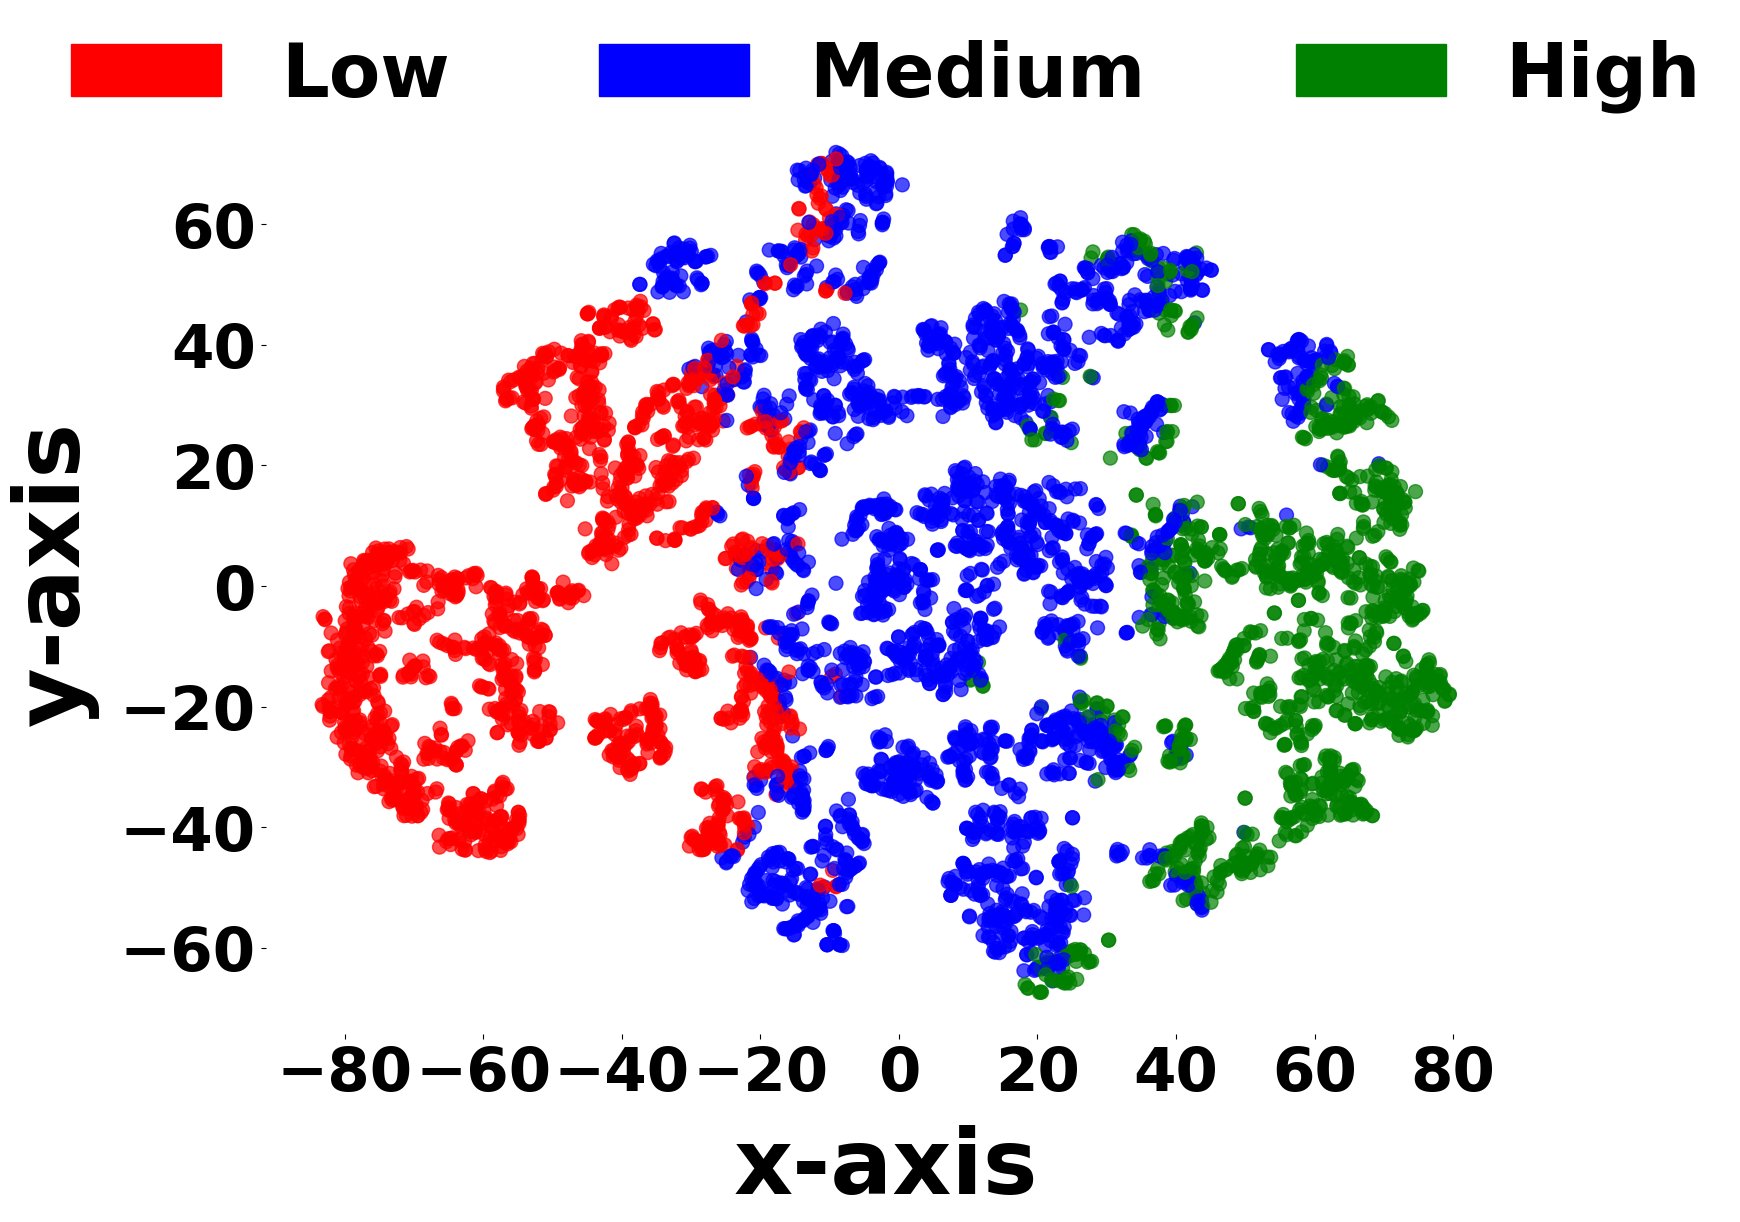

In [17]:
import pickle
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch
import matplotlib.patches as mpatches

# Load the embeddings and predicted stats
with open("influencer_stats.pkl", "rb") as f:
    influencer_stats = pickle.load(f)

# Load the original and downsampled influence counts
with open("influence_counts_before_after.pkl", "rb") as f:
    influence_count_data = pickle.load(f)

# Prepare embedding vectors and original influence counts
embedding_vectors = []
original_counts = []

for entry in influencer_stats:
    influencer_id = entry['influencer_id']
    embedding = entry['embedding_vector']
    embedding_vectors.append(embedding if isinstance(embedding, torch.Tensor) else torch.tensor(embedding))

    # Correctly access original count if value is a tuple
    if influencer_id in influence_count_data:
        original_counts.append(influence_count_data[influencer_id])
    else:
        original_counts.append(0)  # fallback if missing


# Convert to numpy arrays
embedding_vectors = torch.stack(embedding_vectors).numpy()
original_counts = np.array(original_counts)

# Run t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_results = tsne.fit_transform(embedding_vectors)

# Assign colors based on original influence count
colors = []
for count in original_counts:
    if count < 3000:
        colors.append("red")
    elif count < 10000:
        colors.append("blue")
    else:
        colors.append("green")

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Plot the t-SNE result
plt.figure(figsize=(16, 12))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors, alpha=0.7, s=100)


# Axis labels in bold and large
plt.xlabel("x-axis", fontsize=66, fontweight='bold', labelpad=15)
plt.ylabel("y-axis", fontsize=66, fontweight='bold', labelpad=15)

# Bold and large tick labels
plt.xticks(fontsize=44, fontweight='bold')
plt.yticks(fontsize=44, fontweight='bold')

# Remove grid and spines
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Custom legend patches with larger size and bold labels
legend_patches = [
    mpatches.Patch(color='red', label='Low'),
    mpatches.Patch(color='blue', label='Medium'),
    mpatches.Patch(color='green', label='High'),
]

# Render legend above the plot with bold, large font
legend = plt.legend(
    handles=legend_patches,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=3,
    frameon=False,
    fontsize=54
)
for text in legend.get_texts():
    text.set_fontweight('bold')

# Save and show plot
plt.savefig("original_influencer_count.png", dpi=300, bbox_inches='tight')
plt.show()



# Plot of embedding influncer count
- Saves the plot as `embedding_influncer_count.png`

Low Count:  3382
Middle Count:  2148
High Count:  367


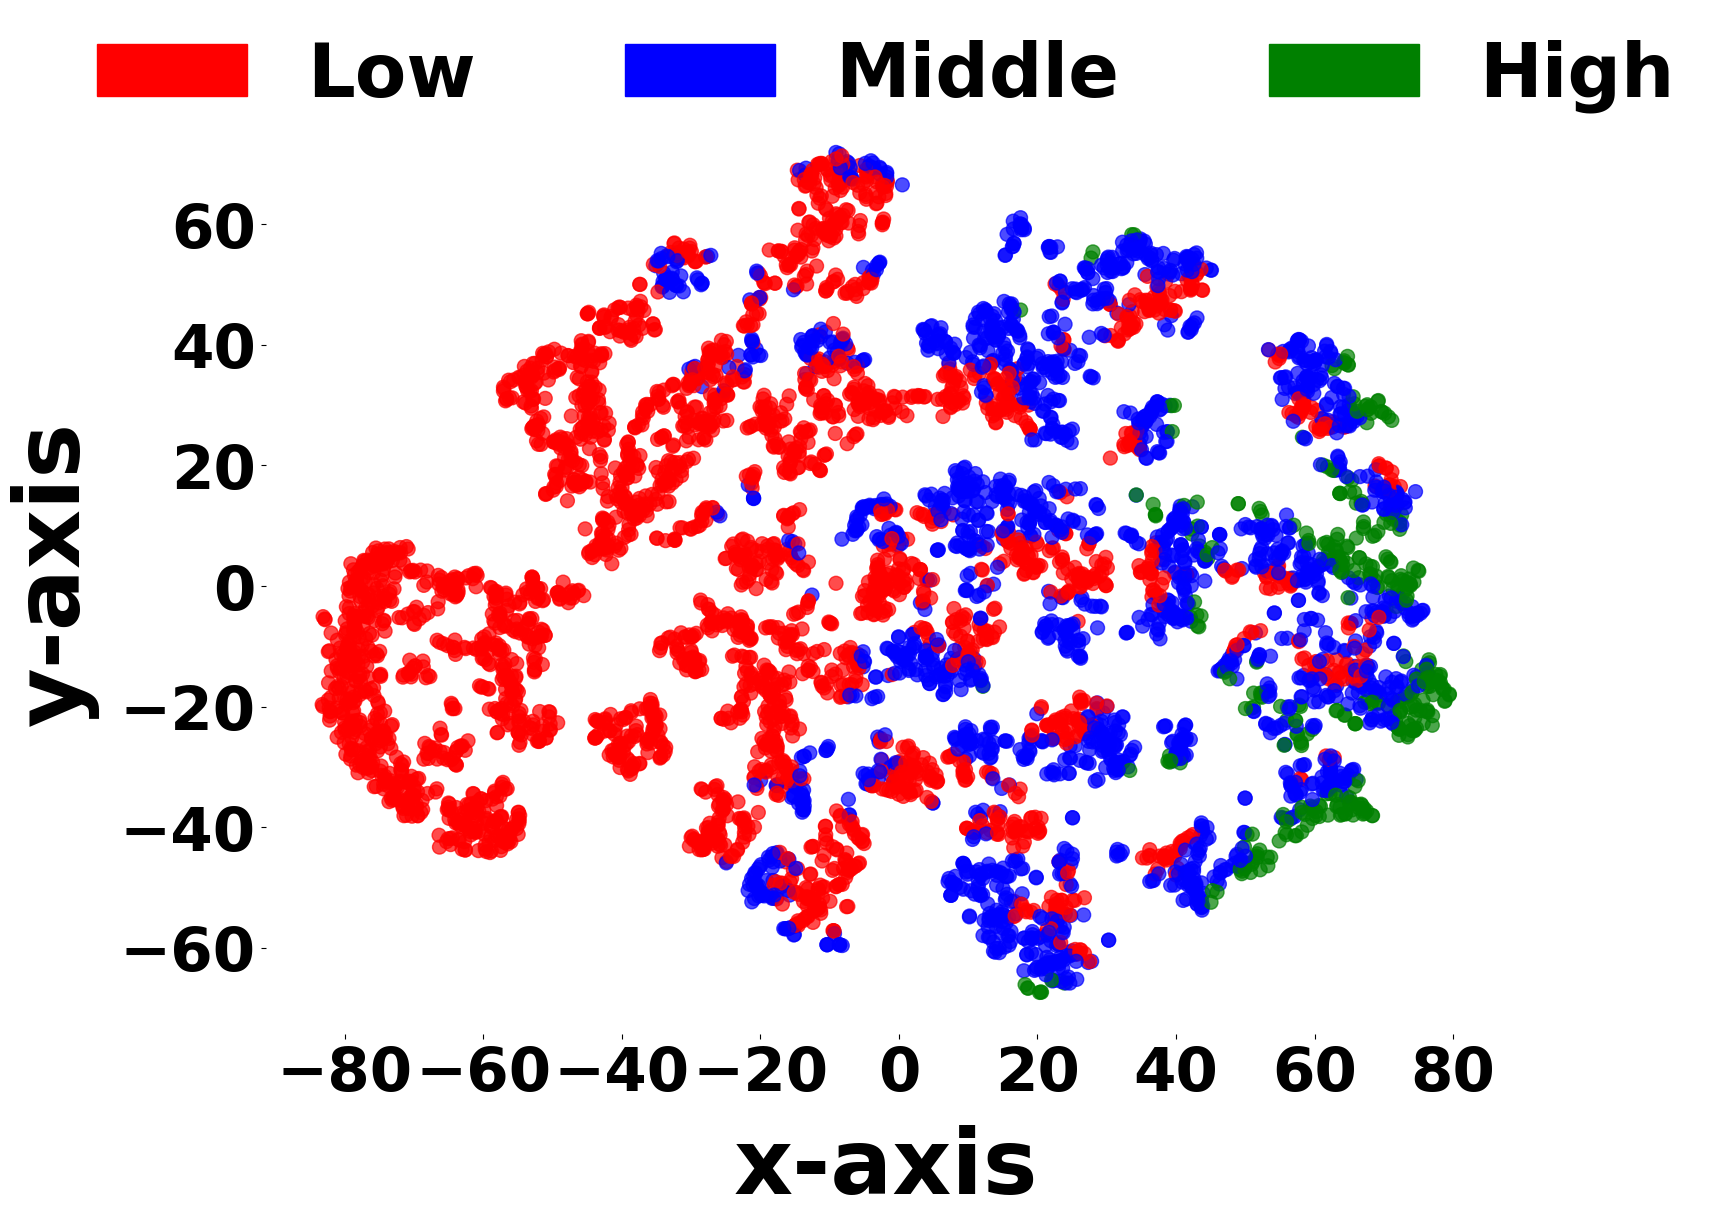

In [18]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Convert embedding_vectors (list of PyTorch tensors or lists) to a 2D NumPy array
embedding_vectors = np.array([entry['embedding_vector'] for entry in influencer_stats])
influence_counts = [entry['influence_count'] for entry in influencer_stats]

# Run t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_results = tsne.fit_transform(embedding_vectors)

# Assign colors based on influence count
colors = []
low_count = 0
middle_count = 0
high_count = 0
for count in influence_counts:
    if count <3000:
        low_count += 1
        colors.append("red")        # Low influence
    elif count < 10000:
        middle_count += 1
        colors.append("blue")       # Middle influence
    else:
        high_count += 1
        colors.append("green")      # High influence

print(f"Low Count: ", low_count)
print(f"Middle Count: ", middle_count)
print(f"High Count: ", high_count)


import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create the plot
plt.figure(figsize=(16, 12))

# Scatter plot
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors, alpha=0.7, s=100)

# Axis labels in bold and larger font
plt.xlabel("x-axis", fontsize=66, fontweight='bold', labelpad=15)
plt.ylabel("y-axis", fontsize=66, fontweight='bold', labelpad=15)

# Tick labels in bold and larger font
plt.xticks(fontsize=44, fontweight='bold')
plt.yticks(fontsize=44, fontweight='bold')


# Remove grid and axis box (spines)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Custom legend with bold and larger labels
legend_patches = [
    mpatches.Patch(color='red', label='Low'),
    mpatches.Patch(color='blue', label='Middle'),
    mpatches.Patch(color='green', label='High'),
]

legend = plt.legend(
    handles=legend_patches,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=3,
    frameon=False,
    fontsize=54
)
for text in legend.get_texts():
    text.set_fontweight('bold')

# Save and display
plt.savefig("embedding_influncer_count.png", dpi=300, bbox_inches='tight')
plt.show()

# Plot of fairness plot
- Saves the plot as `fairness_plot.png`

Low Fairness: 3256
Middle Fairness: 1628
High Fairness: 1013


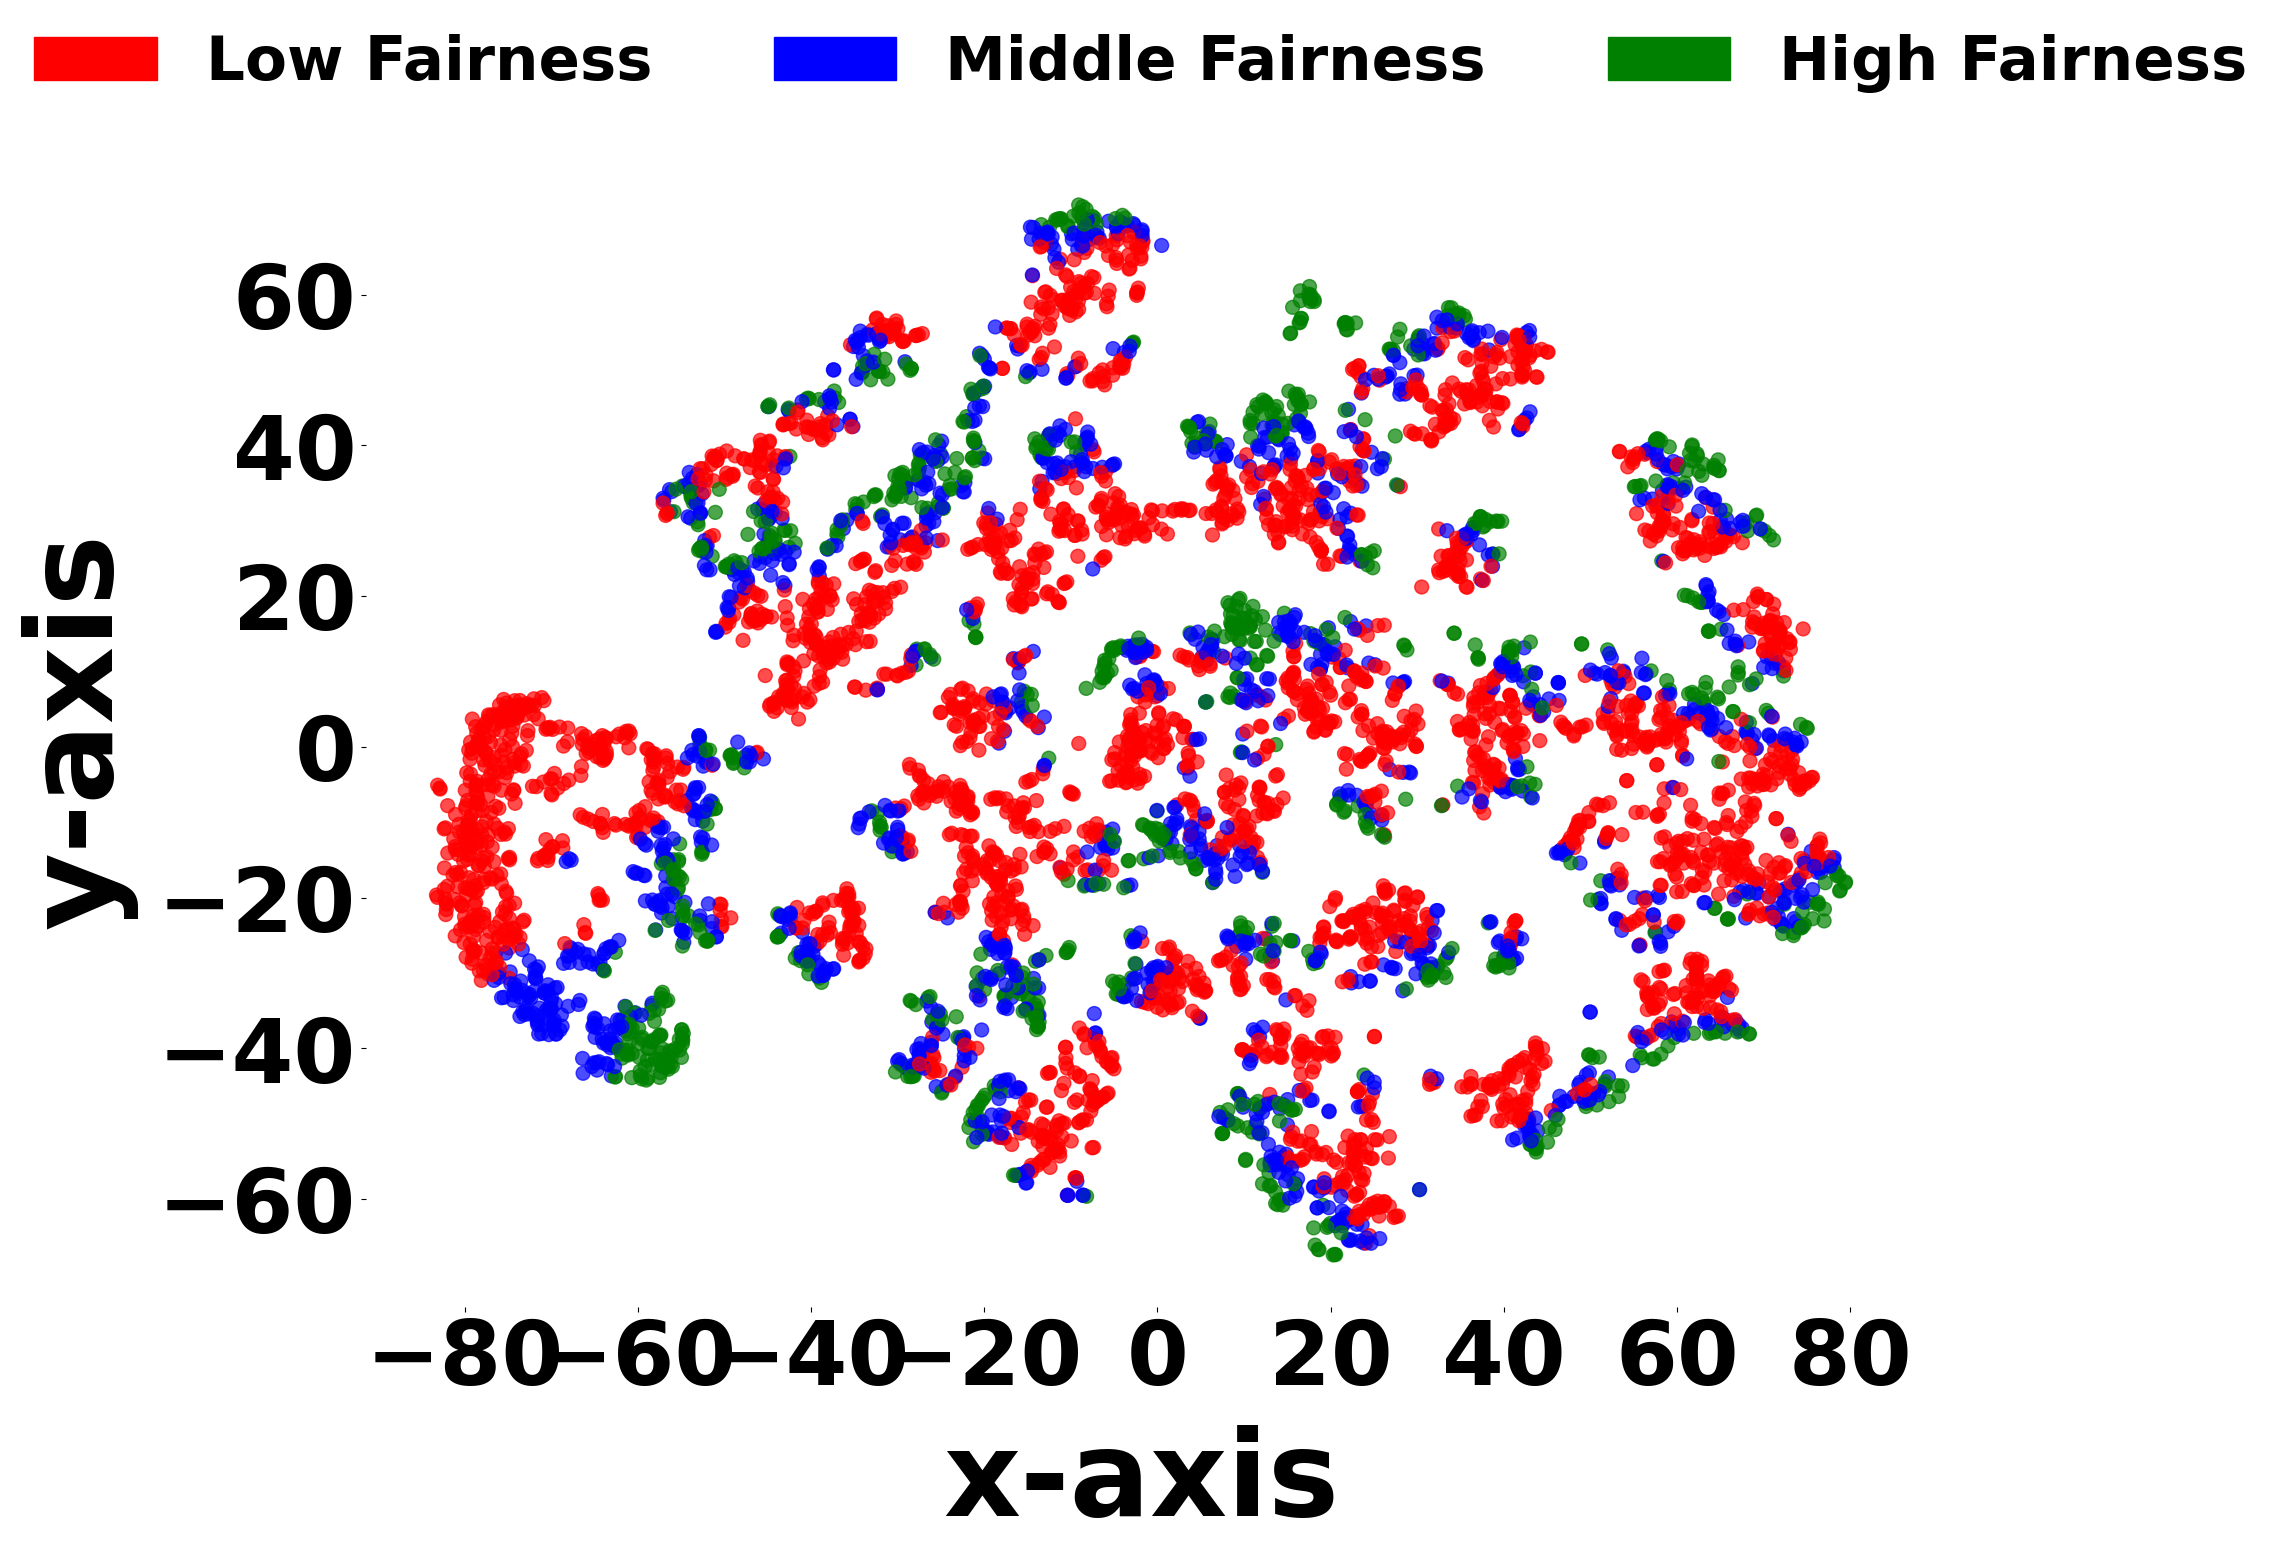

In [19]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Convert embeddings to numpy array
embedding_vectors = np.array([entry['embedding_vector'] for entry in influencer_stats])
fairness_scores = [entry['true_fairness'] for entry in influencer_stats]

# Run t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_results = tsne.fit_transform(embedding_vectors)

# Assign colors based on fairness score
colors = []
low_count = 0
middle_count = 0
high_count = 0
for score in fairness_scores:
    if score <= 0.6:
        colors.append("red")
        low_count += 1
    elif score <= 0.85:
        colors.append("blue")
        middle_count += 1
    else:
        colors.append("green")
        high_count += 1

print(f"Low Fairness: {low_count}")
print(f"Middle Fairness: {middle_count}")
print(f"High Fairness: {high_count}")

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Plot the t-SNE result
plt.figure(figsize=(20, 15))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors, alpha=.7, s=100)


# Axis labels in bold and large
plt.xlabel("x-axis", fontsize=86, fontweight='bold', labelpad=15)
plt.ylabel("y-axis", fontsize=86, fontweight='bold', labelpad=15)

# Bold and large tick labels
plt.xticks(fontsize=64, fontweight='bold')
plt.yticks(fontsize=64, fontweight='bold')

# Remove grid and spines
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Custom legend patches with larger size and bold labels
legend_patches = [
    mpatches.Patch(color='red', label='Low Fairness'),
    mpatches.Patch(color='blue', label='Middle Fairness'),
    mpatches.Patch(color='green', label='High Fairness')
]

# Render legend above the plot with bold, large font
legend = plt.legend(
    handles=legend_patches,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=3,
    frameon=False,
    fontsize=44
)
for text in legend.get_texts():
    text.set_fontweight('bold')

# Save and show plot
plt.savefig("fairness_plot.png", dpi=300, bbox_inches='tight')
plt.show()

## Analyze Top Influencers by Influence Count

1. Load `influencer_stats.pkl`.
2. Sort entries by `influence_count` (descending).
3. Print each influencer's:
   - `ID`, `L1`, `L2` norm
   - `Influence Count`
   - `True` vs `Predicted Fairness`

**Output:**  
Printed top influencers with embedding stats and fairness scores.


In [20]:
with open("influencer_stats.pkl", "rb") as f:
    loaded_stats = pickle.load(f)

# Sort by L1 norm (descending)
sorted_by_l1 = sorted(loaded_stats, key=lambda x: x['influence_count'], reverse=True)

print("\n🔝 Top Influencers by L1 Norm:\n")
for entry in sorted_by_l1:
    print(f"ID: {entry['influencer_id']}, L1: {entry['l1_norm']:.4f}, L2: {entry['l2_norm']:.4f}, Influence Count: {entry['influence_count']},")
    print(f"True Fairness: {entry['true_fairness']:.4f}, Predicted Fairness: {entry['predicted_fairness']:.4f}\n")


🔝 Top Influencers by L1 Norm:

ID: 4466, L1: 4.2386, L2: 2.0449, Influence Count: 27179,
True Fairness: 0.9551, Predicted Fairness: 0.9648

ID: 4065, L1: 5.8755, L2: 2.2988, Influence Count: 26523,
True Fairness: 0.9706, Predicted Fairness: 0.9781

ID: 5833, L1: 3.8339, L2: 1.8537, Influence Count: 24778,
True Fairness: 0.8720, Predicted Fairness: 0.8843

ID: 3937, L1: 6.0013, L2: 2.1089, Influence Count: 24003,
True Fairness: 0.9507, Predicted Fairness: 0.9552

ID: 5363, L1: 4.8479, L2: 1.8471, Influence Count: 23241,
True Fairness: 0.8499, Predicted Fairness: 0.8552

ID: 3915, L1: 6.3102, L2: 2.0294, Influence Count: 22596,
True Fairness: 0.9140, Predicted Fairness: 0.9191

ID: 4218, L1: 7.2680, L2: 2.3626, Influence Count: 22127,
True Fairness: 0.9849, Predicted Fairness: 0.9950

ID: 5740, L1: 5.4370, L2: 2.0448, Influence Count: 21986,
True Fairness: 0.8865, Predicted Fairness: 0.8895

ID: 5067, L1: 6.9304, L2: 2.1396, Influence Count: 21325,
True Fairness: 0.9151, Predicted Fairn